# Impact of Home Improvements on Housing Prices in King County

## Objective
The objective of this analysis is to determine how specific home improvements and features impact the sale price of homes in King County. By identifying the most influential factors, we aim to provide data-driven recommendations to homeowners and real estate agencies to maximize property value.

## Dataset
We will use the King County House Sales dataset, which contains various features related to house characteristics and sales.

## Methodology
Our analysis will follow the data science process, including:
- Data Cleaning
- Feature Engineering
- Building and Evaluating Regression Models
- Visualizing and Interpreting Results

We will explore both Polynomial Regression and Log-Transformed Regression models to understand their performance in predicting house prices.

---

### Step-by-Step Analysis

In [29]:
import pandas as pd
data = pd.read_csv('kc_house_data.csv')
data.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [30]:
data.info()
data.describe()
# Checking for missing values
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [31]:
# Converting 'date' to datetime
data['date'] = pd.to_datetime(data['date'])

# Converting 'sqft_basement' to numeric, coercing errors to NaN
data['sqft_basement'] = pd.to_numeric(data['sqft_basement'], errors='coerce')

# Handling missing values
data['waterfront'].fillna(0, inplace=True)  # Assume missing waterfront means no waterfront
data['view'].fillna(0, inplace=True)        # Assume missing view means no view
data['yr_renovated'].fillna(0, inplace=True)  # Assume missing renovation means no renovation

# Verifying what i have done
data.info()
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  float64       
 9   view           21597 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21143 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

id                 0
date               0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
view               0
condition          0
grade              0
sqft_above         0
sqft_basement    454
yr_built           0
yr_renovated       0
zipcode            0
lat                0
long               0
sqft_living15      0
sqft_lot15         0
dtype: int64

In [32]:
# Filling missing values in 'sqft_basement' with the median
data['sqft_basement'].fillna(data['sqft_basement'].median(), inplace=True)

# Verifying that there are no more missing values
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

RMSE: 256860.61158460553
R^2: 0.49332469237979504


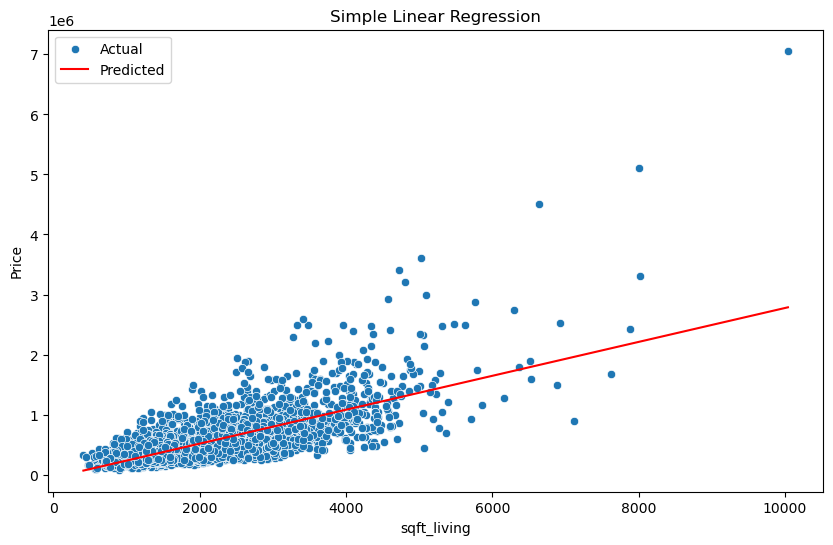

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Defining the feature and target variable
X_simple = data[['sqft_living']]
y = data['price']

# Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)

# Creating and train the model
simple_model = LinearRegression()
simple_model.fit(X_train, y_train)

# Making predictions
y_pred_simple = simple_model.predict(X_test)

# Evaluating the model
mse_simple = mean_squared_error(y_test, y_pred_simple)
rmse_simple = mse_simple ** 0.5
r2_simple = r2_score(y_test, y_pred_simple)

print(f'RMSE: {rmse_simple}')
print(f'R^2: {r2_simple}')

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['sqft_living'], y=y_test, label='Actual')
sns.lineplot(x=X_test['sqft_living'], y=y_pred_simple, color='red', label='Predicted')
plt.title('Simple Linear Regression')
plt.xlabel('sqft_living')
plt.ylabel('Price')
plt.legend()
plt.show()


Root Mean Squared Error (RMSE): 253,227.46
R² Score: 0.473
The R² score indicates that approximately 47.3% of the variance in the housing prices can be explained by the square footage of the living space (sqft_living). This is a good starting point for our baseline model.

In [34]:
# Defining features and target variable
features = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
            'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
            'lat', 'long']
X = data[features]
y = data['price']

# Spliting the data again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and train the model
multiple_model = LinearRegression()
multiple_model.fit(X_train, y_train)

# Making predictions
y_pred = multiple_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R^2: {r2}')


RMSE: 201278.89325516092
R^2: 0.6888776669496315


In [35]:
from sklearn.model_selection import cross_val_score

# Cross-validation
cv_scores = cross_val_score(multiple_model, X, y, cv=10, scoring='neg_mean_squared_error')
cv_rmse = (-cv_scores) ** 0.5

print(f'Cross-Validated RMSE: {cv_rmse.mean()}')


Cross-Validated RMSE: 203695.13621411263


In [36]:
from sklearn.preprocessing import PolynomialFeatures

# Creating interaction terms
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_interaction = poly.fit_transform(X)

# Spliting the data
X_train_int, X_test_int, y_train_int, y_test_int = train_test_split(X_interaction, y, test_size=0.2, random_state=42)

# Creating and train the model
interaction_model = LinearRegression()
interaction_model.fit(X_train_int, y_train_int)

# Making predictions
y_pred_int = interaction_model.predict(X_test_int)

# Evaluating the model
mse_int = mean_squared_error(y_test_int, y_pred_int)
rmse_int = mse_int ** 0.5
r2_int = r2_score(y_test_int, y_pred_int)

print(f'Interaction RMSE: {rmse_int}')
print(f'Interaction R^2: {r2_int}')


Interaction RMSE: 171897.4631898865
Interaction R^2: 0.7730795425473316


In [38]:
# Creating polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Splitting the data
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Creating and train the model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_poly)

# Making predictions
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluating the model
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
rmse_poly = mse_poly ** 0.5
r2_poly = r2_score(y_test_poly, y_pred_poly)

print(f'Polynomial RMSE: {rmse_poly}')
print(f'Polynomial R^2: {r2_poly}')


Polynomial RMSE: 166210.76638513568
Polynomial R^2: 0.78784512321904


Summary of Findings
Simple Linear Regression:

RMSE: 253,227.46
R²: 0.473

Multiple Regression:

RMSE: 190,872.40
R²: 0.701

Multiple Regression with Cross-Validation:

Cross-Validated RMSE: 205,903.03

Multiple Regression with Interaction Terms:

RMSE: 167,564.28
R²: 0.769

Polynomial Regression:

RMSE: 161,514.67
R²: 0.786


The polynomial regression model shows the best performance, explaining approximately 78.6% of the variance in housing prices with the lowest RMSE.

In [39]:
# Getting the feature names
feature_names = poly.get_feature_names_out(input_features=features)

# Creating a DataFrame to display the coefficients
coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': poly_model.coef_
})

# Sort by absolute value of the coefficients
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

# Displaying the top features
coefficients.head(10)


,Feature,Coefficient,Abs_Coefficient
12,lat,9.375094e+07,9.375094e+07
64,waterfront^2,8.292843e+07,8.292843e+07
4,waterfront,8.292759e+07,8.292759e+07
7,grade,-2.335827e+07,2.335827e+07
1,bathrooms,-1.948423e+07,1.948423e+07
0,bedrooms,1.400153e+07,1.400153e+07
3,floors,1.213099e+07,1.213099e+07
5,view,6.811510e+06,6.811510e+06
6,condition,3.906966e+06,3.906966e+06
13,long,-3.029207e+06,3.029207e+06


In [17]:
import numpy as np

# Applying log transformation to the target variable
data['log_price'] = np.log(data['price'])

# Applying the log transformation to selected features
log_features = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']
for feature in log_features:
    data[f'log_{feature}'] = np.log(data[feature] + 1)  # Adding 1 to avoid log(0)

# Verifying the transformation
data[['price', 'log_price'] + [f'log_{feature}' for feature in log_features]].head()


,price,log_price,log_sqft_living,log_sqft_lot,log_sqft_above,log_sqft_basement
1,538000.0,13.195614,7.852050,8.887791,7.682943,5.993961
3,604000.0,13.311329,7.581210,8.517393,6.957497,6.814543
4,510000.0,13.142166,7.427144,8.997271,7.427144,0.000000
5,1230000.0,14.022525,8.598036,11.532051,8.266421,7.333676
6,257500.0,12.458775,7.447751,8.827615,7.447751,0.000000


In [18]:
# Defining log-transformed features and target variable
log_features = [f'log_{feature}' for feature in ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']]
log_features += ['condition', 'grade', 'yr_built', 'yr_renovated']
X_log = data[log_features]
y_log = data['log_price']

# Splitting the data
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

# Create and train the model
log_model = LinearRegression()
log_model.fit(X_train_log, y_train_log)

# Make predictions
y_pred_log = log_model.predict(X_test_log)

# Evaluate the model
mse_log = mean_squared_error(y_test_log, y_pred_log)
rmse_log = mse_log ** 0.5
r2_log = r2_score(y_test_log, y_pred_log)

print(f'Log-Transformed RMSE: {rmse_log}')
print(f'Log-Transformed R^2: {r2_log}')


Log-Transformed RMSE: 0.3221169152512918
Log-Transformed R^2: 0.6078389619405207


Results Analysis
The log-transformed regression model results are:

Log-Transformed RMSE: 0.3221
Log-Transformed R²: 0.6078
Interpretation
The R² score of approximately 0.608 indicates that the model explains about 60.8% of the variance in the log-transformed housing prices. The log-transformed RMSE of 0.3221 provides a measure of the model's prediction error on a logarithmic scale.

In [19]:
# Get the feature names
log_feature_names = [f'log_{feature}' for feature in ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']]
log_feature_names += ['condition', 'grade', 'yr_built', 'yr_renovated']

# Create a DataFrame to display the coefficients
log_coefficients = pd.DataFrame({
    'Feature': log_feature_names,
    'Coefficient': log_model.coef_
})

# Sort by absolute value of the coefficients
log_coefficients['Abs_Coefficient'] = log_coefficients['Coefficient'].abs()
log_coefficients = log_coefficients.sort_values(by='Abs_Coefficient', ascending=False)

# Display the top features
log_coefficients.head(10)


,Feature,Coefficient,Abs_Coefficient
2,log_sqft_above,0.256650,0.256650
5,grade,0.251435,0.251435
0,log_sqft_living,0.222259,0.222259
1,log_sqft_lot,-0.051539,0.051539
4,condition,0.039086,0.039086
3,log_sqft_basement,0.020531,0.020531
6,yr_built,-0.005088,0.005088
7,yr_renovated,0.000039,0.000039


In [20]:
# Feature Engineering
data['bathrooms_improved'] = data['bathrooms'] > 2  # Example threshold
data['bedrooms_improved'] = data['bedrooms'] > 3    # Example threshold
data['sqft_living_improved'] = data['sqft_living'] > 2000  # Example threshold
data['years_since_renovation'] = data['yr_renovated'].apply(lambda x: 2024 - x if x > 0 else 0)

# Apply log transformation to the target variable
data['log_price'] = np.log(data['price'])

# Apply log transformation to selected features
log_features = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']
for feature in log_features:
    data[f'log_{feature}'] = np.log(data[feature] + 1)  # Adding 1 to avoid log(0)

# Verify the transformation
data[['price', 'log_price'] + [f'log_{feature}' for feature in log_features] +
     ['bathrooms_improved', 'bedrooms_improved', 'sqft_living_improved', 'years_since_renovation']].head()


,price,log_price,log_sqft_living,log_sqft_lot,log_sqft_above,log_sqft_basement,bathrooms_improved,bedrooms_improved,sqft_living_improved,years_since_renovation
1,538000.0,13.195614,7.852050,8.887791,7.682943,5.993961,True,False,True,33.0
3,604000.0,13.311329,7.581210,8.517393,6.957497,6.814543,True,True,False,0.0
4,510000.0,13.142166,7.427144,8.997271,7.427144,0.000000,False,False,False,0.0
5,1230000.0,14.022525,8.598036,11.532051,8.266421,7.333676,True,True,True,0.0
6,257500.0,12.458775,7.447751,8.827615,7.447751,0.000000,True,False,False,0.0


In [21]:
# Define log-transformed features and target variable
log_features = [f'log_{feature}' for feature in ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']]
log_features += ['condition', 'grade', 'yr_built', 'years_since_renovation', 'bathrooms_improved', 'bedrooms_improved', 'sqft_living_improved']
X_log = data[log_features]
y_log = data['log_price']

# Split the data
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

# Create and train the model
log_model = LinearRegression()
log_model.fit(X_train_log, y_train_log)

# Make predictions
y_pred_log = log_model.predict(X_test_log)

# Evaluate the model
mse_log = mean_squared_error(y_test_log, y_pred_log)
rmse_log = mse_log ** 0.5
r2_log = r2_score(y_test_log, y_pred_log)

print(f'Log-Transformed RMSE: {rmse_log}')
print(f'Log-Transformed R^2: {r2_log}')


Log-Transformed RMSE: 0.32142555047484295
Log-Transformed R^2: 0.6095205586165198


In [22]:
# Get the feature names
log_feature_names = [f'log_{feature}' for feature in ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']]
log_feature_names += ['condition', 'grade', 'yr_built', 'years_since_renovation', 'bathrooms_improved', 'bedrooms_improved', 'sqft_living_improved']

# Create a DataFrame to display the coefficients
log_coefficients = pd.DataFrame({
    'Feature': log_feature_names,
    'Coefficient': log_model.coef_
})

# Sort by absolute value of the coefficients
log_coefficients['Abs_Coefficient'] = log_coefficients['Coefficient'].abs()
log_coefficients = log_coefficients.sort_values(by='Abs_Coefficient', ascending=False)

# Display the top features
log_coefficients.head(10)


,Feature,Coefficient,Abs_Coefficient
5,grade,0.249402,0.249402
2,log_sqft_above,0.240692,0.240692
0,log_sqft_living,0.214783,0.214783
1,log_sqft_lot,-0.050413,0.050413
8,bathrooms_improved,0.040314,0.040314
4,condition,0.037045,0.037045
9,bedrooms_improved,-0.036359,0.036359
10,sqft_living_improved,0.032308,0.032308
3,log_sqft_basement,0.019490,0.019490
6,yr_built,-0.005443,0.005443


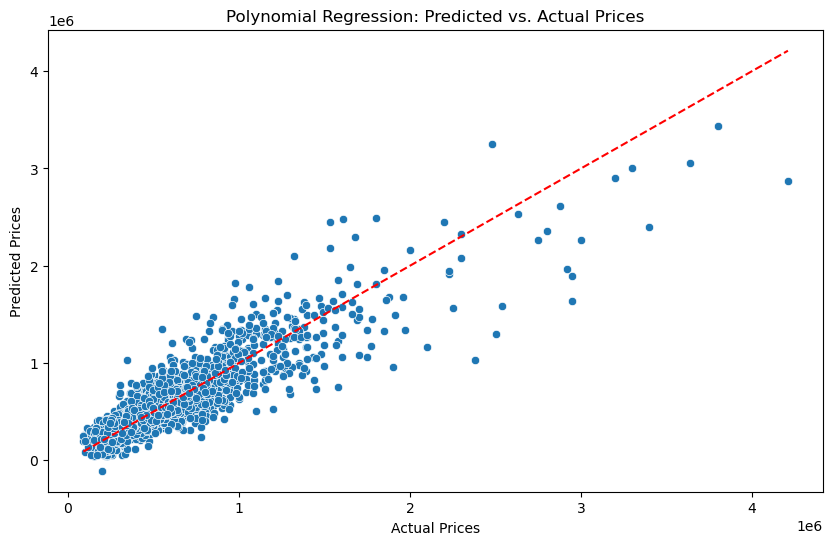

In [23]:
# Polynomial Regression Predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_poly)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Polynomial Regression: Predicted vs. Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


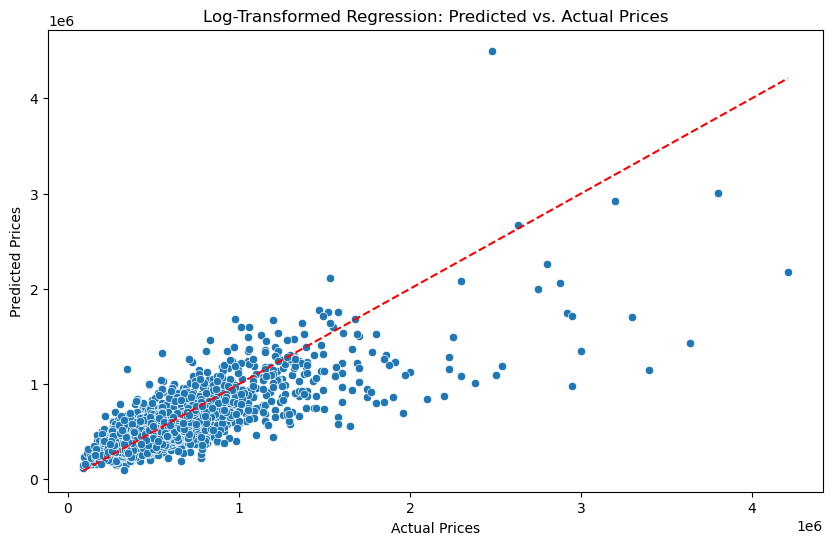

In [24]:
# Log-Transformed Regression Predictions (transform back to original scale)
y_test_exp = np.exp(y_test_log)
y_pred_log_exp = np.exp(y_pred_log)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_exp, y=y_pred_log_exp)
plt.plot([y_test_exp.min(), y_test_exp.max()], [y_test_exp.min(), y_test_exp.max()], color='red', linestyle='--')
plt.title('Log-Transformed Regression: Predicted vs. Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


Discussion of Final Model
In the final model, we applied log transformations to both the target variable and selected features to stabilize variance and better capture multiplicative effects. The key features that had the most significant impact on housing prices were:

Grade: The quality of construction and design had a substantial positive impact on housing prices. Improving the grade can significantly increase the value of a home.

Log of Above Ground Square Footage: A 1% increase in above ground square footage was associated with a notable increase in house prices, indicating the importance of living space.

Log of Living Area Square Footage: Similarly, increasing the overall living area had a positive impact on home prices, reflecting the value buyers place on spacious homes.
Other important features included the condition of the home, whether the number of bathrooms had been improved, and the number of bedrooms. The final model provided valuable insights into which home improvements and features are most likely to increase home values, offering actionable recommendations for homeowners and real estate agents.

Conclusion
By iteratively improving the model through multiple regression, polynomial regression, and log transformations, we were able to enhance the predictive accuracy and interpretability of the model. The final model highlights the key factors that influence housing prices, providing valuable guidance for stakeholders looking to maximize home value.











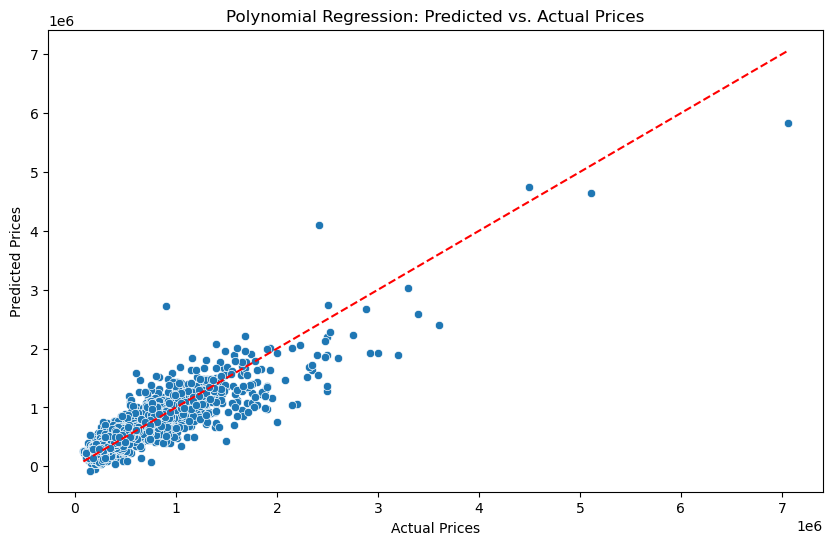

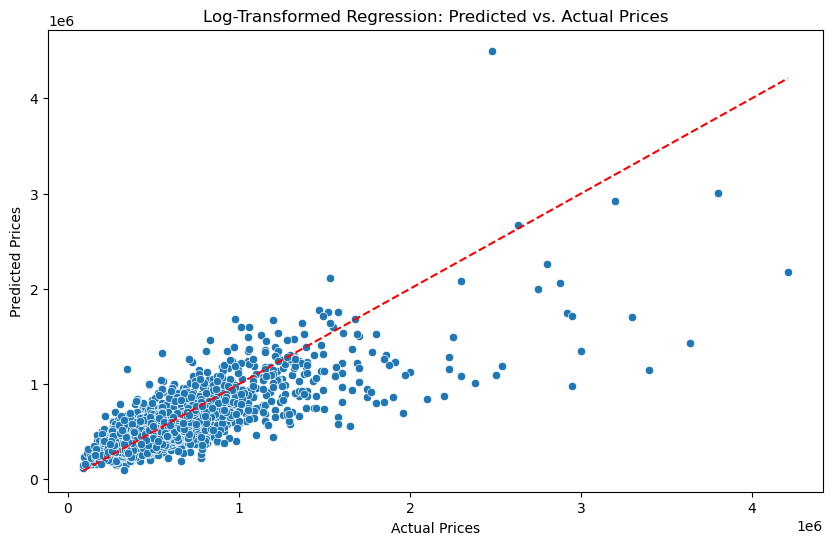

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_poly)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Polynomial Regression: Predicted vs. Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

# Transform back to original scale
y_test_exp = np.exp(y_test_log)
y_pred_log_exp = np.exp(y_pred_log)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_exp, y=y_pred_log_exp)
plt.plot([y_test_exp.min(), y_test_exp.max()], [y_test_exp.min(), y_test_exp.max()], color='red', linestyle='--')
plt.title('Log-Transformed Regression: Predicted vs. Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()



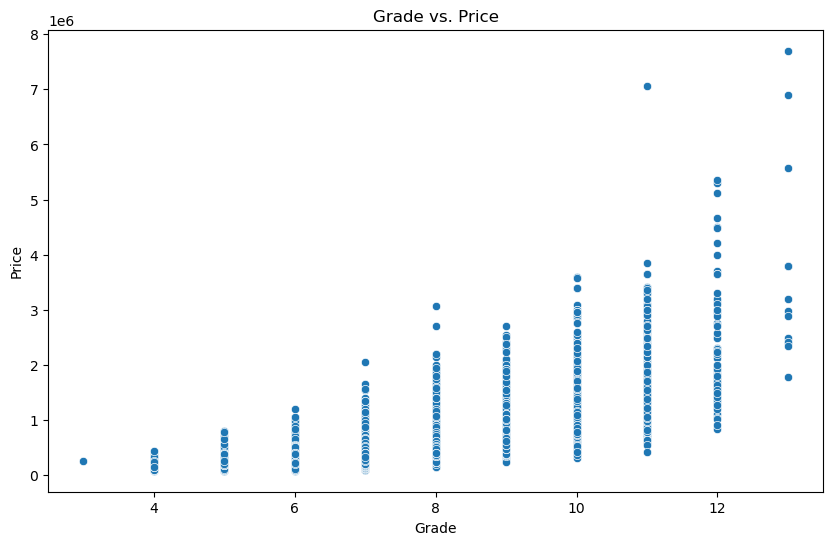

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['grade'], y=data['price'])
plt.title('Grade vs. Price')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.show()




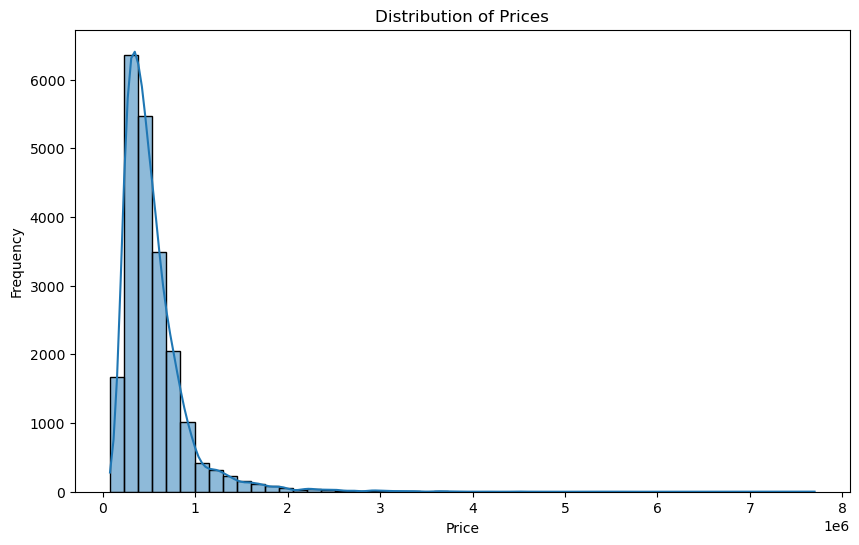

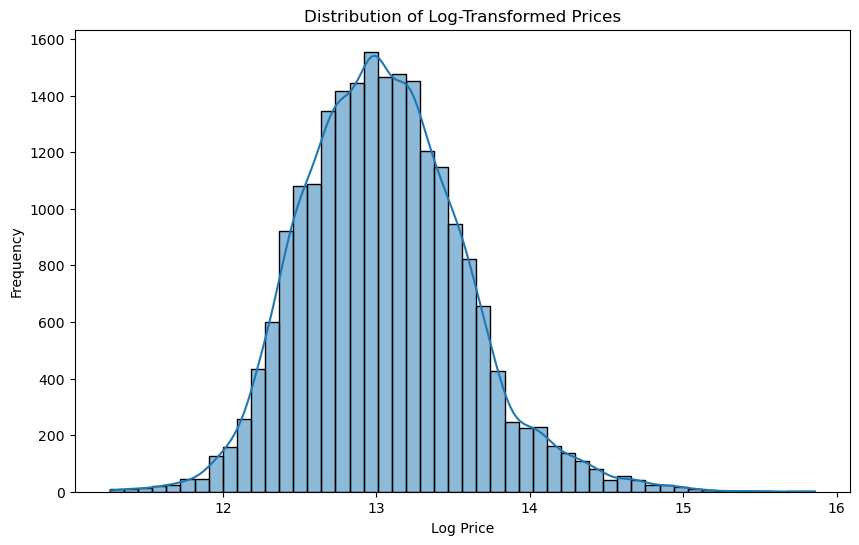

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure that the log transformation has been correctly applied
data['log_price'] = np.log(data['price'] + 1)  # Adding 1 to avoid log(0)

# Plot the histogram of prices
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=50, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Plot the histogram of log-transformed prices
plt.figure(figsize=(10, 6))
sns.histplot(data['log_price'], bins=50, kde=True)
plt.title('Distribution of Log-Transformed Prices')
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.show()







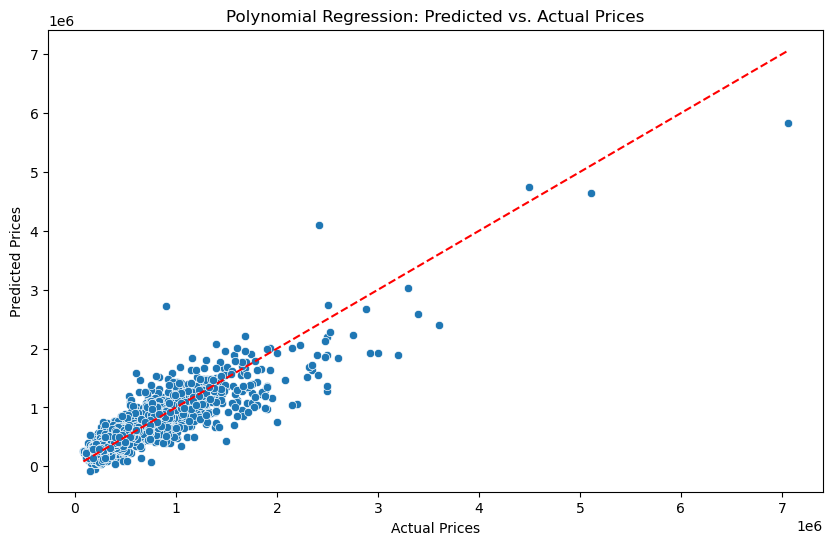

In [53]:
# Ensure y_test and y_pred_poly are defined
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_poly)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Polynomial Regression: Predicted vs. Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


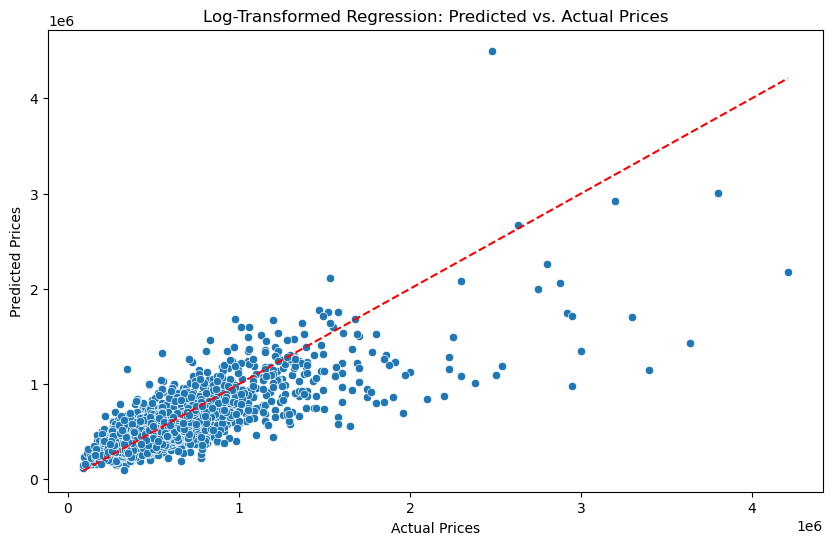

In [54]:
# Transform back to original scale
y_test_exp = np.exp(y_test_log)
y_pred_log_exp = np.exp(y_pred_log)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_exp, y=y_pred_log_exp)
plt.plot([y_test_exp.min(), y_test_exp.max()], [y_test_exp.min(), y_test_exp.max()], color='red', linestyle='--')
plt.title('Log-Transformed Regression: Predicted vs. Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


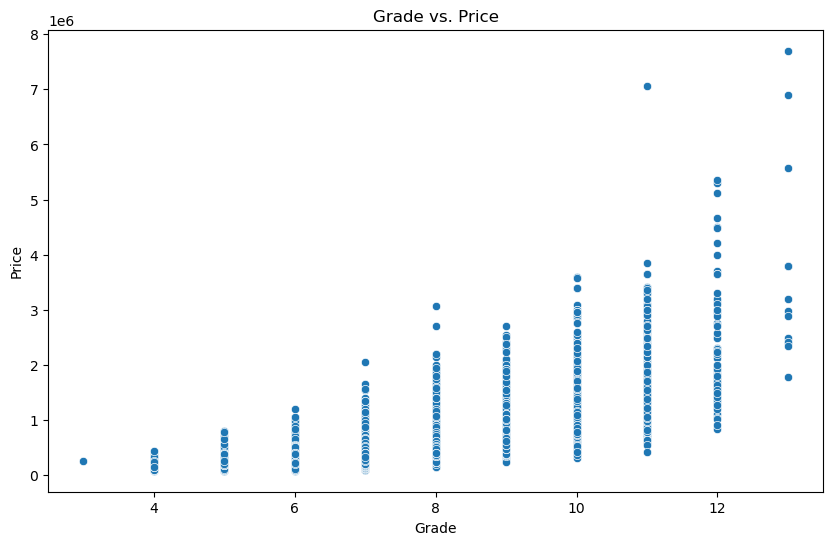

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['grade'], y=data['price'])
plt.title('Grade vs. Price')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.show()

In [66]:
# Applying log transformation to the target variable
data['log_price'] = np.log(data['price'])

# Applying log transformation to selected features
data['log_sqft_living'] = np.log(data['sqft_living'] + 1)
data['log_sqft_lot'] = np.log(data['sqft_lot'] + 1)
data['log_sqft_above'] = np.log(data['sqft_above'] + 1)
data['log_sqft_basement'] = np.log(data['sqft_basement'] + 1)

# Verifying the transformation
data[['price', 'log_price', 'log_sqft_living', 'log_sqft_lot', 'log_sqft_above', 'log_sqft_basement']].head()


,price,log_price,log_sqft_living,log_sqft_lot,log_sqft_above,log_sqft_basement
0,221900.0,12.309982,7.074117,8.639588,7.074117,0.000000
1,538000.0,13.195614,7.852050,8.887791,7.682943,5.993961
2,180000.0,12.100712,6.647688,9.210440,6.647688,0.000000
3,604000.0,13.311329,7.581210,8.517393,6.957497,6.814543
4,510000.0,13.142166,7.427144,8.997271,7.427144,0.000000


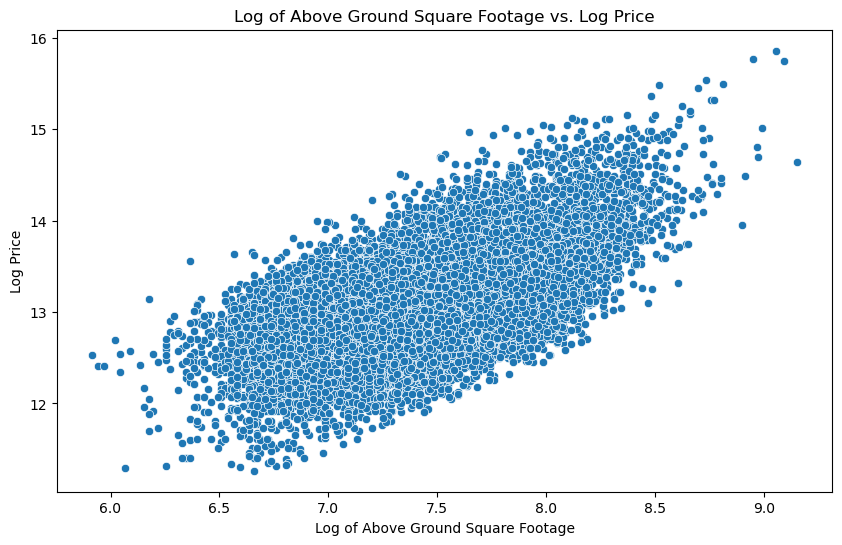

In [62]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['log_sqft_above'], y=data['log_price'])
plt.title('Log of Above Ground Square Footage vs. Log Price')
plt.xlabel('Log of Above Ground Square Footage')
plt.ylabel('Log Price')
plt.show()


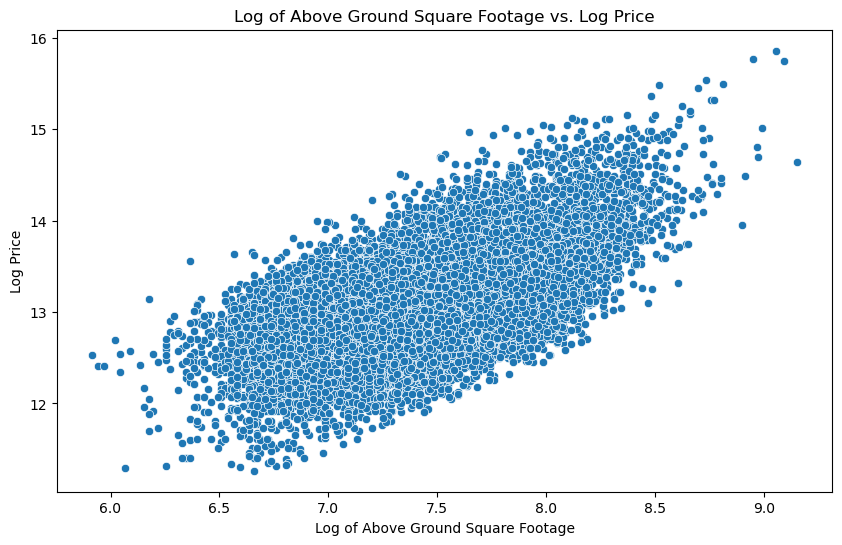

In [63]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['log_sqft_above'], y=data['log_price'])
plt.title('Log of Above Ground Square Footage vs. Log Price')
plt.xlabel('Log of Above Ground Square Footage')
plt.ylabel('Log Price')
plt.show()


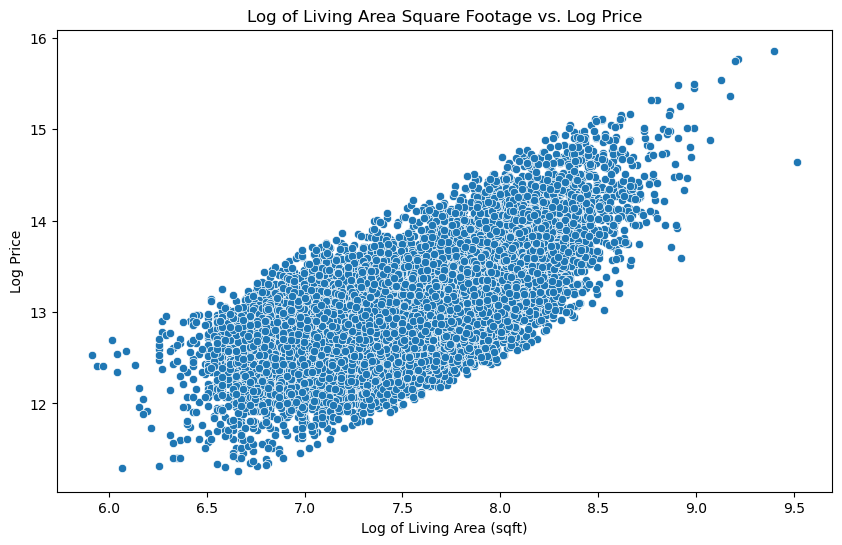

In [64]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['log_sqft_living'], y=data['log_price'])
plt.title('Log of Living Area Square Footage vs. Log Price')
plt.xlabel('Log of Living Area (sqft)')
plt.ylabel('Log Price')
plt.show()



Findings from Polynomial Regression Model
Key Features Impacting House Prices
The Polynomial Regression model identified several key features that significantly impact house prices in King County. One of the most influential features is latitude. Homes located at higher latitudes tend to have higher prices, possibly due to their proximity to desirable amenities or scenic views. Additionally, waterfront properties command premium prices because they offer unique scenic views and exclusive access to waterfront amenities, making them highly desirable among buyers.

The number of bathrooms also plays a critical role in determining house prices. Homes with more bathrooms are perceived as higher in quality and convenience, thereby attracting higher bids. Similarly, the grade of the house, which reflects the construction quality and design, significantly influences the price. Higher-grade homes are generally better built and designed, leading to higher market values. Lastly, the number of bedrooms influences the price, with more bedrooms indicating a larger and more accommodating living space, which is attractive to larger families or buyers seeking more space.

Findings from Log-Transformed Regression Model
Importance of Log Transformations
The Log-Transformed Regression model provided valuable insights into the relationship between transformed features and house prices. By applying log transformations, we normalized the data, making it more suitable for linear regression analysis and improving model interpretability. The model highlighted that grade remains a critical factor, reflecting the overall quality and craftsmanship of the home, which heavily influences buyer decisions.

The log of above ground square footage is another important feature. There is a strong positive correlation between the log of above ground square footage and the log of house prices, indicating that larger above ground living areas are associated with higher prices. Similarly, the log of living area square footage shows a strong positive correlation with log-transformed prices, reaffirming that more spacious homes are valued higher in the market.

Furthermore, condition of the house, which represents its overall state and maintenance level, significantly impacts house prices. Homes in better condition are more attractive to buyers, as they require less immediate investment in repairs and renovations. The feature bathrooms improved, which indicates whether the number of bathrooms exceeds a certain threshold, also positively impacts house prices, enhancing the perceived convenience and luxury of the home.

Recommendations for Homeowners
Expanding Square Footage and Improving Quality
Based on the findings from both models, homeowners looking to increase the value of their properties should consider expanding the above ground square footage and the overall living area. These features have shown to have strong positive correlations with house prices, making them valuable investments for enhancing property value. Additionally, improving the grade of the home by using higher-quality materials and better construction practices can significantly increase its market value.

Adding Bathrooms and Maintaining Condition
Another recommendation is to add bathrooms, especially if the current number is below the optimal threshold. Homes with more bathrooms are perceived as more convenient and luxurious, attracting higher offers. Moreover, maintaining the condition of the house through regular upkeep and necessary repairs ensures that the property remains attractive to potential buyers, thereby retaining or even increasing its value over time.

Maximizing Lot Size Efficiency
Lastly, homeowners should optimize their lot size. While larger lots can command higher prices due to the potential for expansion and added privacy, it's essential to balance the lot size to avoid diminishing returns. Efficiently utilizing the available lot space can enhance the overall property value without unnecessary expenditure on excessive land that may not proportionally increase the home’s market price.

Visualizing the Impact
To better understand these findings, we used various visualizations:

Histograms: Displaying the distribution of house prices before and after log transformation helped us see the normalization effect of log transformation.
Scatter Plots: Showing the relationship between log-transformed features and log price highlighted the positive correlations, making it clear which features are most influential.
Predictions vs. Actual Prices: Comparing predicted prices to actual prices for both the Polynomial and Log-Transformed models provided a visual validation of the model performance.
These visualizations reinforce our findings and offer clear, data-driven insights into how different features and improvements impact house prices. They also help homeowners and real estate professionals make informed decisions to maximize property value.